<a href="https://colab.research.google.com/github/StanislavParkhomenko/Lab_Neiro/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from keras.models import Sequential # модель прямого розповсюдження
from keras.layers import Dense # повнозв'язні прошарки

fl = pd.read_csv("Alcohol_sales.csv");
fl.shape

(325, 2)

In [4]:
fl.tail(5)

,DATE,S4248SM144NCEN
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504
324,2019-01-01,10718


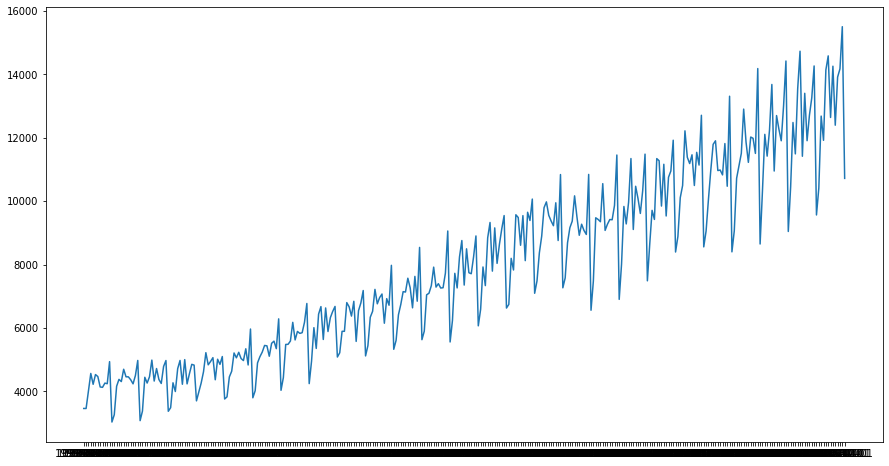

In [5]:
plt.figure(figsize = (15, 8))
plt.plot(fl['DATE'],fl['S4248SM144NCEN'])
plt.show()

In [6]:
fl.isnull().sum()

DATE              0
S4248SM144NCEN    0
dtype: int64

In [7]:
def create_dataset(create_dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset) - look_back - 1):
    a = dataset[i:(i + look_back),0]
    dataX.append(a)
    dataY.append(dataset[i + look_back,0])
  return np.array(dataX), np.array(dataY)

fl2 = pd.read_csv("Alcohol_sales.csv", usecols=[1], engine='python');
dataset = fl2.values
dataset = dataset.astype('float32')
fl2.head(6)

,S4248SM144NCEN
0,3459
1,3458
2,4002
3,4564
4,4221
5,4529


In [8]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)

Epoch 1/400
161/161 - 1s - loss: 77194288.0000 - 885ms/epoch - 5ms/step
Epoch 2/400
161/161 - 0s - loss: 32657316.0000 - 166ms/epoch - 1ms/step
Epoch 3/400
161/161 - 0s - loss: 2083748.5000 - 172ms/epoch - 1ms/step
Epoch 4/400
161/161 - 0s - loss: 1312972.5000 - 179ms/epoch - 1ms/step
Epoch 5/400
161/161 - 0s - loss: 1315227.8750 - 165ms/epoch - 1ms/step
Epoch 6/400
161/161 - 0s - loss: 1301250.3750 - 189ms/epoch - 1ms/step
Epoch 7/400
161/161 - 0s - loss: 1305015.3750 - 168ms/epoch - 1ms/step
Epoch 8/400
161/161 - 0s - loss: 1292710.1250 - 171ms/epoch - 1ms/step
Epoch 9/400
161/161 - 0s - loss: 1284587.1250 - 182ms/epoch - 1ms/step
Epoch 10/400
161/161 - 0s - loss: 1304089.2500 - 177ms/epoch - 1ms/step
Epoch 11/400
161/161 - 0s - loss: 1292499.0000 - 186ms/epoch - 1ms/step
Epoch 12/400
161/161 - 0s - loss: 1287361.6250 - 199ms/epoch - 1ms/step
Epoch 13/400
161/161 - 0s - loss: 1274947.6250 - 183ms/epoch - 1ms/step
Epoch 14/400
161/161 - 0s - loss: 1250575.0000 - 183ms/epoch - 1ms/step

Train Score: 1044038.69 MSE (1021.78 RMSE)
Test Score: 1044038.69 MSE (1021.78 RMSE)


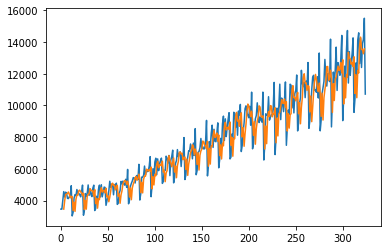

In [11]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Зсув trainPredict для побудови графічного відрізку
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Зсув testPredict для побудови графічного відрізку
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
#testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# ERROR arrey 321

# Базовий графік та прогнози
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()